# Desafio final

Este projeto tem como objetivo realizar uma análise abrangente do consumo de energia elétrica no Brasil, utilizando dados de 2004 a 2023. O desafio consiste em explorar padrões de consumo energético, identificar tendências ao longo do tempo e investigar possíveis correlações com fatores socioeconômicos e geográficos. Através de técnicas de análise exploratória de dados e visualizações informativas, buscaremos compreender as variações no consumo entre diferentes estados, regiões e tipos de consumidores. Além disso, examinaremos a influência de fatores como população e desenvolvimento econômico no consumo de energia. Esta análise visa fornecer insights valiosos sobre o panorama energético brasileiro, contribuindo para uma compreensão mais profunda dos padrões de consumo e potencialmente auxiliando na formulação de políticas energéticas mais eficientes e sustentáveis. Para transparência, esse desafio foi feito de forma colaborativa com inteligência artificial em questões de estrutura e estilos claros e concisos da linguagem Python, buscando sempre que possível o pep-8.

In [133]:
# para começar com o pé direito
print('Hello, world!')

Hello, world!


## Estrutura de arquivos

Antes de mergulharmos na análise do consumo energético brasileiro, é crucial estabelecer uma base sólida para nosso projeto. Uma estrutura organizada e um sistema de versionamento eficiente são fundamentais para garantir a integridade e reprodutibilidade do nosso trabalho.

Para este projeto, adotei a seguinte estrutura de diretórios:

![Estrutura de diretórios e arquivos](../imagens/estrutura_inicio.png)

Esta organização permite uma clara separação entre dados brutos, processados e o código de análise, facilitando a navegação e manutenção do projeto.

Além disso, utilizo o GitHub para controle de versão, o que não só previne perdas acidentais, mas também abre portas para colaborações futuras. Um arquivo `.gitignore` foi configurado para excluir a pasta do ambiente virtual do versionamento, mantendo nosso repositório enxuto e focado apenas nos elementos essenciais do projeto.

Com esta base estabelecida, estamos prontos para iniciar nossa análise do consumo energético no Brasil, assegurando que nosso trabalho seja organizado, rastreável e colaborativo.

## Bibliotecas usadas

In [134]:
# análise e manipulação de dataframes
import pandas as pd
# geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Preparação

### Criação dos dataframes iniciais

Para importar os dataframes, vamos dar uma breve olhada nos arquivos. Para isso vou abrir o arquivo csv no próprio VS Code, para saber qual é o separador:

![visualização do arquivo csv](../imagens/qual_separador.png)

Podemos ver que o separador é vírgula e que há arquivos ausentes já que tem duas vígulas na sequencia nos primeiros dados.

Agora usando a extensão DataWrangler:

![Visualização do CSV pelo DataWangler](../imagens/entendo_dataset_dw.png)

Podemos ver que em consumidores temos quase 1/3 de dados ausentes (Antes de verificarmos dados duplicados), isso é importante na nossa análise, voltaremos a isso logo mais.

### Importando os dados de energia elétrica

In [135]:
# importando o dataset de energia com o seperador por vírgulas
dataset_energia =  pd.read_csv('../dados/brutos/consumo_energia_eletrica.csv', sep=',', encoding='utf-8')

### Análise de dados duplicados para energia elétrica

Vamos verificar se temos dados duplicados, podemos usar duplicated().sum() e obter a quantidade, mas é interessantes podemos olhar de perto essas duplicatas e termos a certeza de que de fato são duplicatas. Minha abordagem será colocar esses valores em sequência, o dado original seguido do dado duplicado, mas como podem ser muitos dados, vamos adicionar um parâmetro para a escolha de visualização resumida ou completa.

In [136]:
import pandas as pd

def identifica_duplicatas(dataframe, resumido=True):
    """
    Identifica e exibe as linhas duplicadas em um DataFrame.
    
    Args:
    dataframe (pd.DataFrame): O DataFrame a ser analisado.
    resumido (bool): Se True, exibe um resumo padrão. Se False, exibe todas as linhas duplicadas agrupadas.
    
    Returns:
    pd.DataFrame: DataFrame contendo as linhas duplicadas.
    """
    # Identificar todas as linhas duplicadas
    duplicados = dataframe[dataframe.duplicated(keep=False)]

    # Ordenar as duplicatas para agrupar as linhas idênticas
    duplicados_ordenados = duplicados.sort_values(by=dataframe.columns.tolist())

    if resumido:
        # Exibir as duplicatas no formato resumido padrão do pandas
        quantidade_duplicados = dataframe.duplicated().sum()
        print(f'Foram encontradas {quantidade_duplicados} duplicatas, para ver todas as duplicatas, configure o parâmetro "resumido para False"')
        print("-" * 80)  # Linha separadora entre grupos
        print(duplicados_ordenados)
    else:
        # Configurar o pandas para mostrar todas as colunas
        with pd.option_context('display.max_columns', None, 'display.width', None):
            # Agrupar as duplicatas
            grupos = duplicados_ordenados.groupby(duplicados_ordenados.columns.tolist())
            
            for _, grupo in grupos:
                print("Grupo de linhas duplicadas:")
                for index, row in grupo.iterrows():
                    print(f"Linha {index}:")
                    print(row.to_frame().T)  # Transforma a Series em um DataFrame de uma linha
                print("-" * 80)  # Linha separadora entre grupos
                print()  # Linha em branco para melhor legibilidade



In [137]:
identifica_duplicatas(dataset_energia, True)

Foram encontradas 1017 duplicatas, para ver todas as duplicatas, configure o parâmetro "resumido para False"
--------------------------------------------------------------------------------
        ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
37912  2023    1       AC    Comercial              23174.0    21629
38929  2023    1       AC    Comercial              23174.0    21629
38247  2023    1       AC   Industrial                299.0     3803
39264  2023    1       AC   Industrial                299.0     3803
38574  2023    1       AC  Residencial             240560.0    47887
...     ...  ...      ...          ...                  ...      ...
39550  2023   12       TO   Industrial               1413.0    35417
37888  2023   12       TO       Outros              53923.0    51090
38905  2023   12       TO       Outros              53923.0    51090
38856  2023   12       TO  Residencial             576079.0   119941
39873  2023   12       TO  Residencial             

Temos 1017 duplicatas, e a função mostram que realmente são dados duplicados. Vamos então limpar o dataset.

In [138]:
# removendo as duplicatas
dataset_energia.drop_duplicates(keep='first', inplace=True)

In [139]:
# vamos chamar a função novamente para ver se realmente foi efetivo
identifica_duplicatas(dataset_energia, True)

Foram encontradas 0 duplicatas, para ver todas as duplicatas, configure o parâmetro "resumido para False"
--------------------------------------------------------------------------------
Empty DataFrame
Columns: [ano, mes, sigla_uf, tipo_consumo, numero_consumidores, consumo]
Index: []


### Análise de dados ausentes para energia elétrica

Vamos criar uma função que verifica a quantidade de dados ausentes para as colunas desse dataframe, com base nos resultados que obtivermos, vamos decidir qual abordagem tomar.

In [140]:
def analise_dados_ausentes(df, crescente=False, tamanho_figura=(10, 6)):
    """
    Analisa e visualiza dados ausentes em um DataFrame.

    Args:
    df (pd.DataFrame): O DataFrame a ser analisado.
    crescente (bool): Se True, ordena do menor para o maior. Se False, do maior para o menor.
    tamanho_figura (tuple): Tamanho da figura do gráfico.

    Returns:
    None
    """
    # Calcular o número de valores ausentes por coluna
    valores_ausentes = df.isnull().sum().sort_values(ascending=crescente)
    
    # Calcular a porcentagem de valores ausentes
    porcentagens_ausentes = 100 * df.isnull().sum() / len(df)
    porcentagens_ausentes = porcentagens_ausentes.sort_values(ascending=crescente)

    # Criar o gráfico de barras horizontal
    plt.figure(figsize=tamanho_figura, facecolor='white')
    ax = valores_ausentes.plot(kind='barh', color='#4a4a4a')
    
    # Remover bordas
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Remover ticks do eixo y
    ax.tick_params(axis='y', which='both', left=False)
    
    # Adicionar valores
    for i, v in enumerate(valores_ausentes):
        ax.text(v, i, f' {v}', va='center')
    
    # Informações de títulos e rótulos
    plt.title('Quantidade de Dados Ausentes por Coluna', fontsize=14, pad=20)
    plt.xlabel('Número de Dados Ausentes', fontsize=12, labelpad=10)
    plt.ylabel('')  # Remover label do eixo y
    plt.tight_layout()
    plt.savefig('../imagens/quantidade_dados_ausentes.png', format='png', dpi=300)
    plt.show()

    # Imprimir as porcentagens de dados ausentes
    print("\nPorcentagem de Dados Ausentes por Coluna:")
    for col, porcentagem in porcentagens_ausentes.items():
        print(f"{col}: {porcentagem:.2f}%")

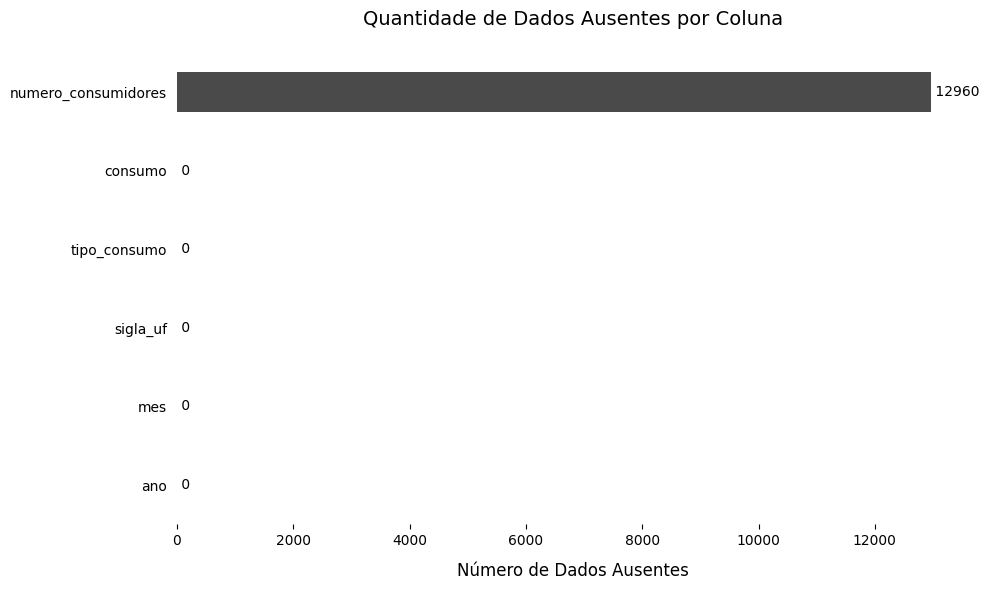


Porcentagem de Dados Ausentes por Coluna:
ano: 0.00%
mes: 0.00%
sigla_uf: 0.00%
tipo_consumo: 0.00%
consumo: 0.00%
numero_consumidores: 33.33%


In [141]:
analise_dados_ausentes(dataset_energia, True)

Temos 1/3 de dados ausentes na coluna "numero_consumidores", vamos analisar o comportamento desses dados ausentes, se é aleatório ou está concentrado.

In [142]:
filtro_ausente = dataset_energia['numero_consumidores'].isnull() == True

In [143]:
dataset_energia[filtro_ausente]

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624
...,...,...,...,...,...,...
37579,2023,12,DF,Cativo,NaN,503565
37580,2023,12,MT,Cativo,NaN,732101
37581,2023,12,RR,Cativo,NaN,112337
37582,2023,12,CE,Cativo,NaN,887204


In [144]:
dataset_energia[filtro_ausente].groupby('ano')['ano'].value_counts()

ano
2004    648
2005    648
2006    648
2007    648
2008    648
2009    648
2010    648
2011    648
2012    648
2013    648
2014    648
2015    648
2016    648
2017    648
2018    648
2019    648
2020    648
2021    648
2022    648
2023    648
Name: count, dtype: int64

Não há concentração de dados ausentes por ano. Cada ano tem exatamente o mesmo valor de dados ausentes. Vamos verificar outras variáveis, como "tipo_consumo".

In [145]:
tipos = dataset_energia['tipo_consumo'].unique()
for tipo in tipos:
  print(f'{tipo} = {len(dataset_energia[dataset_energia['tipo_consumo'] == tipo].value_counts())}')

Total = 0
Cativo = 0
Outros = 6480
Comercial = 6480
Industrial = 6480
Residencial = 6480


Total e Cativo não tem valores ao longo de todo o dataframe e eles compoõe os 12960 valores que faltam no dataframe.

Vamos tentar entender o funcionamento desses valores. Podemos inputar valores para Total uma vez que total é a soma de partes? Mas e o Cativo? 

In [146]:
filtro_ano1 = (dataset_energia['ano'] == 2004) & \
              (dataset_energia['sigla_uf'] == 'TO') & \
              (dataset_energia['mes'] == 2)
dataset_energia[filtro_ano1]

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
52,2004,2,TO,Total,NaN,63306
356,2004,2,TO,Cativo,NaN,63306
698,2004,2,TO,Outros,22324.0,19893
1025,2004,2,TO,Comercial,26102.0,12160
1333,2004,2,TO,Industrial,2411.0,7267
1654,2004,2,TO,Residencial,233251.0,23986


Nessa amostra podemos perceber que o consumo dos tipos Residencial, Industrial, Comercial e Outros são equivalentes ao Total e que Cativo tem o mesmo valor de Total.

In [147]:
filtro_ano2 = (dataset_energia['ano'] == 2023) & \
              (dataset_energia['sigla_uf'] == 'SP') & \
              (dataset_energia['mes'] == 10)
dataset_energia[filtro_ano2]

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
37200,2023,10,SP,Total,NaN,12212694
37509,2023,10,SP,Cativo,NaN,6979373
37849,2023,10,SP,Outros,384492.0,1306374
38158,2023,10,SP,Comercial,1176035.0,2669487
38489,2023,10,SP,Industrial,91621.0,4339535
38799,2023,10,SP,Residencial,19055719.0,3897297


Nessa outra amostra, novamente o consumo dos tipos Residencial, Industrial, Comercial e Outros equivale ao Total, e dessa vez Cativo não tem o mesmo valor, mas é um valor menor. Podemos deduzir que Cativo é uma representação especial que engloba os outros tipos de consumo? Vamos utilizar uma função para ver se é o caso para todo o dataframe.

In [148]:
def verificar_consumo(df, ano, mes, sigla_uf):
    """
    Verifica a consistência dos dados de consumo para um determinado ano, mês e UF.
    
    Args:
    df (pd.DataFrame): O DataFrame com os dados de consumo.
    ano (int): O ano a ser verificado.
    mes (int): O mês a ser verificado.
    sigla_uf (str): A sigla da UF a ser verificada.
    
    Returns:
    dict: Um dicionário com os resultados da verificação.
    """
    filtro = (df['ano'] == ano) & (df['mes'] == mes) & (df['sigla_uf'] == sigla_uf)
    dados_filtrados = df[filtro]
    
    total = dados_filtrados[dados_filtrados['tipo_consumo'] == 'Total']['consumo'].values[0]
    cativo = dados_filtrados[dados_filtrados['tipo_consumo'] == 'Cativo']['consumo'].values[0]
    
    tipos_especificos = ['Outros', 'Comercial', 'Industrial', 'Residencial']
    soma_especificos = dados_filtrados[dados_filtrados['tipo_consumo'].isin(tipos_especificos)]['consumo'].sum()
    
    soma_igual_total = abs(soma_especificos - total) < 1  # Tolerância de 1 unidade para evitar problemas de arredondamento
    cativo_menor_igual_total = cativo <= total
    
    return {
        'ano': ano,
        'mes': mes,
        'sigla_uf': sigla_uf,
        'total': total,
        'soma_especificos': soma_especificos,
        'cativo': cativo,
        'soma_igual_total': soma_igual_total,
        'cativo_menor_igual_total': cativo_menor_igual_total
    }

def verificar_todos_dados(df):
    resultados = []
    contador_soma_diferente = 0
    contador_cativo_maior = 0
    
    combinacoes = df[['ano', 'mes', 'sigla_uf']].drop_duplicates()
    
    for _, row in combinacoes.iterrows():
        resultado = verificar_consumo(df, row['ano'], row['mes'], row['sigla_uf'])
        
        if not resultado['soma_igual_total']:
            contador_soma_diferente += 1
            print(f"\nDiscrepância na soma (Total vs Específicos):")
            print(f"Ano: {resultado['ano']}, Mês: {resultado['mes']}, UF: {resultado['sigla_uf']}")
            print(f"Total: {resultado['total']}")
            print(f"Soma dos Específicos: {resultado['soma_especificos']}")
            print(f"Diferença: {abs(resultado['total'] - resultado['soma_especificos'])}")
        
        if not resultado['cativo_menor_igual_total']:
            contador_cativo_maior += 1
            print(f"\nCativo maior que Total:")
            print(f"Ano: {resultado['ano']}, Mês: {resultado['mes']}, UF: {resultado['sigla_uf']}")
            print(f"Total: {resultado['total']}")
            print(f"Cativo: {resultado['cativo']}")
            print(f"Diferença: {resultado['cativo'] - resultado['total']}")
        
        resultados.append(resultado)
    
    print(f"\nTotal de discrepâncias na soma: {contador_soma_diferente}")
    print(f"Total de casos onde Cativo > Total: {contador_cativo_maior}")
    
    return pd.DataFrame(resultados)

# Aplicar a verificação
df_resultados = verificar_todos_dados(dataset_energia)


Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: TO
Total: 65876
Soma dos Específicos: 65875
Diferença: 1

Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: BA
Total: 1444451
Soma dos Específicos: 1444449
Diferença: 2

Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: PR
Total: 1596274
Soma dos Específicos: 1596273
Diferença: 1

Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: RS
Total: 1780912
Soma dos Específicos: 1780910
Diferença: 2

Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: SE
Total: 192207
Soma dos Específicos: 192205
Diferença: 2

Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: MG
Total: 3732811
Soma dos Específicos: 3732810
Diferença: 1

Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: MS
Total: 272917
Soma dos Específicos: 272915
Diferença: 2

Discrepância na soma (Total vs Específicos):
Ano: 2004, Mês: 1, UF: RJ
Total: 2612753
Soma dos Es

A função mostra que há diferenças entre as somas das partes (exceto Cativo) e o Total, mas que essa diferença é na maioria dos casos 1 ou 2 kW e que em três vezes que Cativo foi maior do que o Total a diferença foi de 1kW. Então podemos deduzir o que se mostra a seguir:

1. **Expressão do Consumo Total**:
   $$
   \text{Total} = Residencial + Industrial + Comercial + Outros
   $$

2. **Consumo Cativo como Parte do Total**:
   
   Podemos expressar que o consumo Cativo ($\text{Cativo}$) está contido no Total ($\text{Total}$) da seguinte maneira:
   $$
   \text{Cativo} \subseteq \text{Total}
   $$

3. **Definição Condicional do Consumo Cativo**:
   
   Ou seja:
   $$
   \text{Cativo} = \{ x \in \text{Total} \mid x \text{ representa um consumo que faz parte do regime cativo} \}
   $$


O que é Cativo?

O consumo cativo é um tipo de contratação de energia elétrica em que o consumidor é obrigado a comprar energia de uma concessionária local e pagar as tarifas estabelecidas pelo governo. 
No mercado cativo, o consumidor não pode negociar o preço da energia e está sujeito a cobranças extras, como as bandeiras tarifárias. As tarifas são reguladas pela Agência Nacional de Energia Elétrica (ANEEL) e são estabelecidas considerando os custos de geração, transmissão e distribuição. 
O consumidor cativo é um participante do Ambiente de Contratação Regulada (ACR), que é a forma tradicional de consumir energia no Brasil. A maioria dos consumidores comuns fazem parte do mercado cativo. 
O consumidor cativo pode pagar pela eletricidade por meio de tarifa monômia ou binômia, dependendo de sua classe de tensão. 
O consumidor cativo pode migrar para o mercado livre de energia, desde que comunique a mudança à distribuidora com, no mínimo, seis meses de antecedência.

Fontes: https://srna.co/consumidor-cativo-e-consumidor-livre-entenda-as-diferencas/ https://blog.esferaenergia.com.br/mercado-livre-de-energia/o-que-mercado-cativo-energia https://www.portalsolar.com.br/qual-a-diferenca-entre-consumidor-cativo-e-consumidor-livre-de-energia 

Com base nisso, não excluirei dados, mas segmentarei levando em consideração a ausência de dados em numero_consumidores para Cativos.

In [149]:
# criando o dataframe final
dataset_energia.to_csv('../dados/processados/df.csv')

In [150]:
df = dataset_energia.copy()

### importando a base de estados

Podemos observar, olhando o arquivo csv que não há dados duplicados, que o separador é ";", mas que temos problemas com o encoding.

![Visualização do CSV da base de estados](../imagens/base_estados.png)

In [151]:
# importando a base de estados usando encoding latin1 para a acentuação
df_estados = pd.read_csv('../dados/brutos/estado_regiao.csv', sep=';', encoding='latin1')

In [152]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


Vamos fazer duas intervenções nessa base, como a base de dados de energia usa sigla_uf para identificar os estados, não precisamos da coluna id_estado e como estamos trabalhando apenas com dados do Brasil, não precisamos da coluna país. Vamos então renomear a coluna sigla para sigla_uf e excluir id_estado e pais.

In [153]:
# removendo as colunas
df_estados.drop(['id_estado', 'pais'], axis=1, inplace=True)

# renomeando a coluna para o join
df_estados.rename(columns={'sigla': 'sigla_uf'}, inplace=True)


In [155]:
df_estados.head()

,sigla_uf,estado,regiao
0,AC,Acre,Norte
1,AL,Alagoas,Nordeste
2,AP,Amapá,Norte
3,AM,Amazonas,Norte
4,BA,Bahia,Nordeste


In [156]:
df_estados.to_csv('../dados/processados/df_estados.csv')